In [42]:
import yfinance as yf
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Set default seaborn figure size
sns.axes_style(rc={'figure.figsize': (10, 5)})

# ==== Marcos
SYMBOL = "IBIT"

# =====
# Fetch [SYMBOL] data with a 1-minute interval
df = yf.download(SYMBOL, interval="1m", period="1d")

df['LR'] = np.log(df['Close'] / df['Open'])
df['dLR'] = np.log(df['Close'] / df['Open']).diff()
df['dVolume'] = df['Volume'].diff()


# For Volume
df = df.iloc[4:]

# Display the fetched data
df.reset_index(inplace=True)
df.dropna(inplace=True)
df['sigma'] = df['dLR'].map(abs)
df['Date'] = df['Datetime'].dt.date
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Datetime,Close,High,Low,Open,Volume,LR,dLR,dVolume,sigma,Date
Ticker,,IBIT,IBIT,IBIT,IBIT,IBIT,,,,,
0,2025-01-08 14:34:00+00:00,54.409401,54.419998,54.169998,54.209999,228615,0.003672,0.002287,-16309.0,0.002287,2025-01-08
1,2025-01-08 14:35:00+00:00,54.375000,54.500000,54.369999,54.419998,279557,-0.000827,-0.004499,50942.0,0.004499,2025-01-08
2,2025-01-08 14:36:00+00:00,54.279800,54.389999,54.259998,54.389999,98293,-0.002028,-0.001201,-181264.0,0.001201,2025-01-08
3,2025-01-08 14:37:00+00:00,54.172401,54.349998,54.149200,54.290001,298796,-0.002168,-0.000140,200503.0,0.000140,2025-01-08
4,2025-01-08 14:38:00+00:00,54.169998,54.222401,54.099998,54.169998,84370,0.000000,0.002168,-214426.0,0.002168,2025-01-08


## smoothing

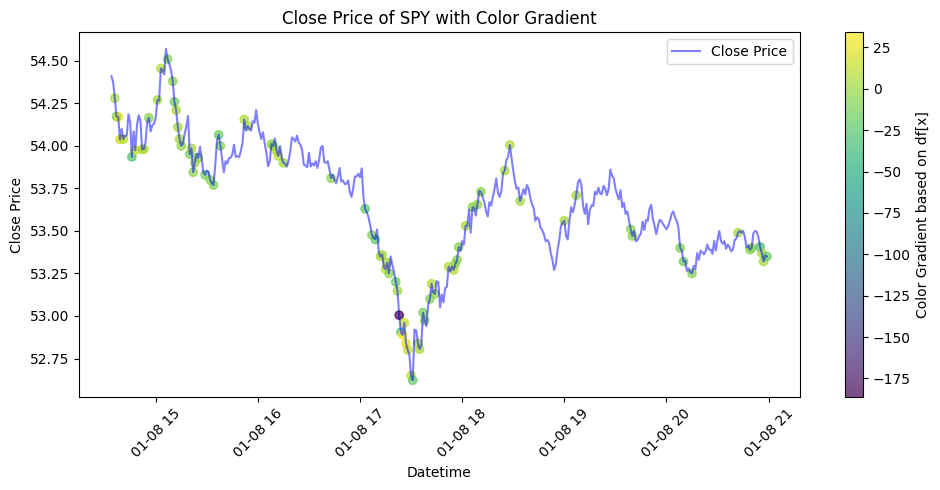

In [43]:
T = 10

df['sLR'] = df['LR'].ewm(span=T).mean()
df['sdVolume'] = df['dVolume'].ewm(span=T).mean()
df['ssigma'] = df['sigma'].ewm(span=T).mean()
df['x'] = (df['sLR'] * df['sdVolume']).iloc[2:]

# Filter out points where x is near 0
threshold = 3  # Define a threshold for filtering
filtered_df = df[(df['x'].abs() > threshold)]
df['x'] = (df['sLR'] * df['sdVolume']).iloc[2:]

plt.figure(figsize=(10, 5))
plt.plot(df['Datetime'], df['Close'], label='Close Price', color='blue', alpha=0.5)  # Add Close line plot
plt.scatter(filtered_df['Datetime'], filtered_df['Close'], c=filtered_df['x'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Color Gradient based on df[x]')
plt.title('Close Price of SPY with Color Gradient')
plt.xlabel('Datetime')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()  # Add legend to the plot
plt.tight_layout()
plt.show()
